<a href="https://colab.research.google.com/github/duongtran96/Project_IMDB_Review/blob/Feature/Project_IMDB_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Tải thư viện contractions**

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.1 MB/s eta 0:00:00


# **2. Đọc bộ dữ liệu**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/IMDB-Dataset.csv")
df = df.drop_duplicates()

In [ ]:
df.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
stop = set(stopwords.words('english'))

# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

# Fuction to clean data
def preprocess_text(text):
    w1 = WordNetLemmatizer()

    soup = BeautifulSoup(text, 'html.parser')   # Removing html tags

    text = soup.get_text()
    text = expand_contractions(text)    # Expanding chatwords and contracts clearing contractions

    emoji_clean = re.compile("["
                            u"\U0001F600-\U0001F64F"
                            u"\U0001F300-\U0001F5FF"
                            u"\U0001F680-\U0001F6FF"
                            u"\U0001F1E0-\U0001F1FF"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+", flags = re.UNICODE)

    text = emoji_clean.sub(r'', text)
    text = re.sub(r'\.(?=\S)', '.', text)       # add space after full stop
    text= re.sub(r'http\S+', '', text)          # remove urls
    text = "".join([word.lower() for word in text if word not in string.punctuation])    # remove punctuation and make text lowercase

    text= " ".join([w1.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()])
    return text


In [ ]:
df['review'] = df['review'].apply(preprocess_text)


<ipython-input-7-49d975e368c1>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')   # Removing html tags


In [ ]:
df

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


# **3. Phân tích dữ liệu**

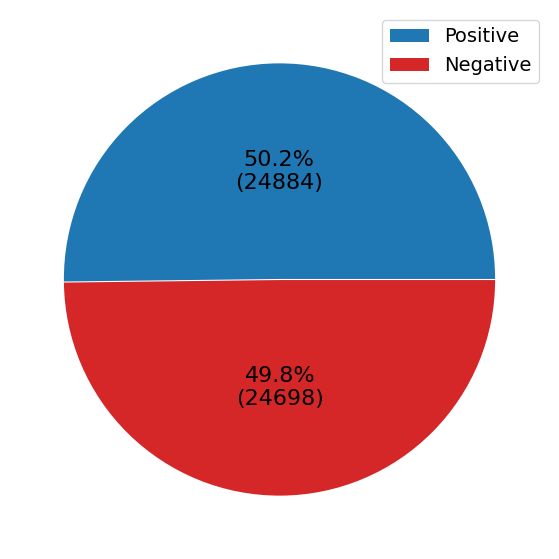

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freg_pos = len(df[df['sentiment'] == 'positive'])
freg_neg = len(df[df['sentiment'] == 'negative'])

data = [freg_pos, freg_neg]

labels = ['positive', 'negative']

# Create pie chart
pie, ax = plt.subplots(figsize = [11, 7])
plt.pie(x = data, autopct = lambda pct : func(pct, data), explode =[0.0025] * 2, pctdistance = 0.5, colors = [sns.color_palette()[0], 'tab:red'], textprops = {'fontsize' : 16})

#
labels = [r'Positive', r'Negative']
plt.legend(labels, loc = "best", prop = {'size' : 14})
#pie.savefig("PieChart.png")
plt.show()

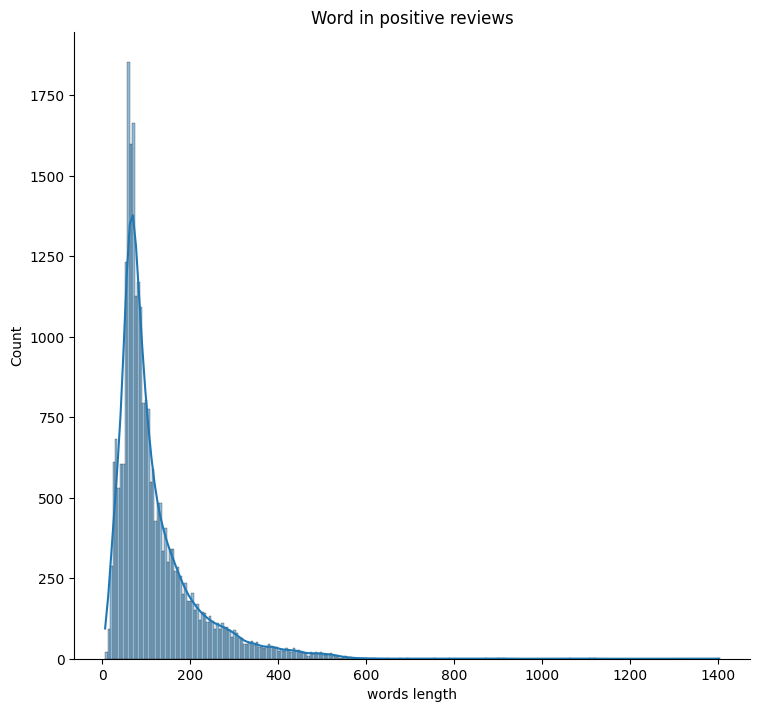

In [ ]:
words_len = df['review'].str.split().map(lambda x : len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

hist_positive = sns.displot(data = df_temp[df_temp['sentiment']  == 'positive'],
                            x = "words length",
                            hue = "sentiment",
                            kde = True, height = 7,
                            aspect = 1.1, legend = False
                            ).set(title = 'Word in positive reviews')

plt.show(hist_positive)

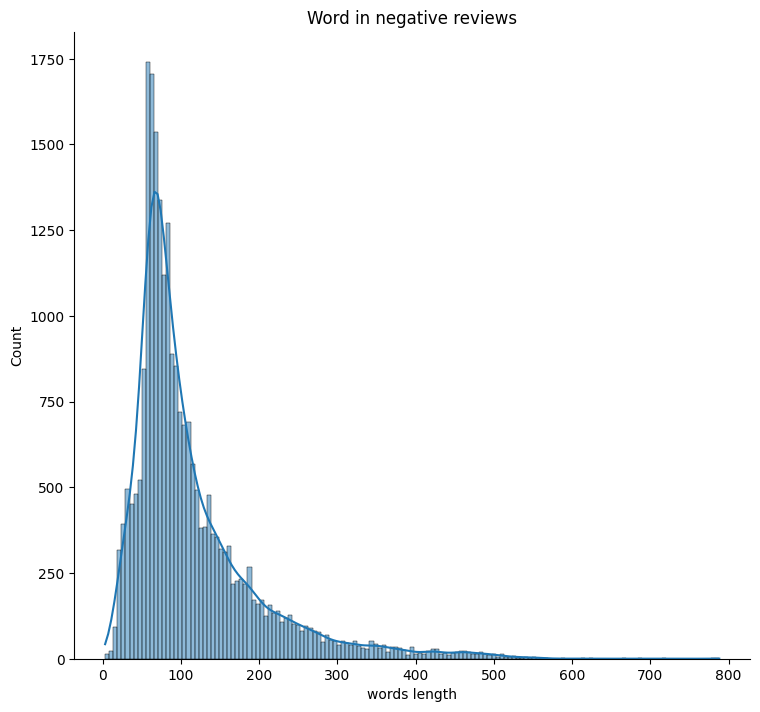

In [ ]:
hist_negative = sns.displot(data = df_temp[df_temp['sentiment']  == 'negative'],
                            x = "words length",
                            hue = "sentiment",
                            kde = True, height = 7,
                            aspect = 1.1, legend = False
                            ).set(title = 'Word in negative reviews')

plt.show(hist_negative)

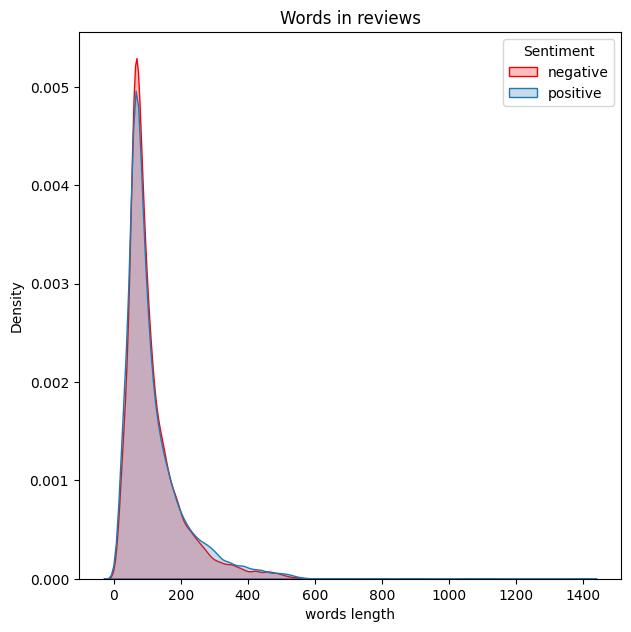

In [ ]:
plt.figure(figsize = (7, 7.1))
kernel_distribution_number_words_plot = sns.kdeplot(data = df_temp,
                                                    x = "words length",
                                                    hue = "sentiment", fill = True,
                                                    palette = [sns.color_palette()[0], 'red']
                                                    ).set(title = 'Words in reviews')

plt.legend(title = "Sentiment", labels = ['negative', 'positive'])
plt.show(kernel_distribution_number_words_plot)


# **4. Chia tập train test**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
x_data = df['review']
y_data = label_encode.fit_transform(df['sentiment'])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [ ]:
y_data[:5]

array([1, 1, 1, 0, 1])

In [ ]:
x_train = x_train.astype(str)

In [ ]:
x_test = x_test.astype(str)

# **5. Biểu diễn văn bản thành vector**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features = 10000)
tfidf_vectorizer.fit(x_train, y_train)

x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

In [ ]:
x_train_encoded.shape

(39665, 10000)

# **6. Huấn luyện và đánh giá mô hình**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



## 6.1 Decision Tree

In [ ]:
dt_classifier = DecisionTreeClassifier(
    criterion = 'entropy',
    random_state = 42
)

dt_classifier.fit(x_train_encoded, y_train)
y_pred = dt_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

0.7093879197337905

## 6.2 Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(
    random_state = 42
)

rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

0.8408792981748513

## 6.3 AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
df_ada_classifier = AdaBoostClassifier(random_state = 42)

df_ada_classifier = df_ada_classifier.fit(x_train_encoded, y_train)
ada_y_pred = df_ada_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

0.8408792981748513

## 6.4 Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df_gra_classifier = GradientBoostingClassifier(random_state = 42)

df_gra_classifier = df_gra_classifier.fit(x_train_encoded, y_train)
gra_y_pred = df_gra_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

0.8408792981748513